# Dimensionality Reduction


The basic idea of dimensionality reduction is to transform a high dimensional dataset into a lower dimensional one without losing too much information about the data. 

There are various reasons we might want to do this.


* Speed up training
* Compress dataset
* Visualize data
* Identify important features
* Improve classifier/regression performance (?)

There are a number of dimensionality reduction strategies which we will go over below.

First we meditate about about the "curse of dimensionality".



### Nonintuitive properties of high dimensional space




https://blog.datawow.io/the-curse-of-dimensionality-c99409eb58e9

Hyperspheres inscribed in hypercubes...


![img](sphere.png)

![img](hypersphere.png)

![img](cod.jpeg)

https://www.kdnuggets.com/2015/03/deep-learning-curse-dimensionality-autoencoders.html/2


![img](cod2.png)

In [1]:
"""Average distance of points in a hypercube of dimension d"""

import numpy as np

d = 1000

dists = []
for i in range(1000):
    v = np.random.uniform(size=d)
    w = np.random.uniform(size=d)
    dists.append(np.linalg.norm(v-w))
np.mean(dists)

12.899033641978686

### Extreme points

Most points in a high dimensional hypercube are near the boundary. Almost none are near the center.

Most people are extreme in some dimension :)




## The main approaches to dimensionality reduction

We will consider

* Manifold learning
* Projections

The main difference between these approaches is that projections are "flat" whereas manifolds can be curved. 

A $d$-dimensional manifold is a set of points that is locally "flat".

Technically a manifold is characterized by the property that every sufficiently small open set is homeomorphic to $d$-dimensional euclidean space.

---

Why do we need manifolds?

For example there may be data in 100 dimensions that naturally lies on a 20 dimensional hypersphere.

You can't use linear algebra to project onto the surface of a hypersphere, only a hyperplane. 

For example consider the "swiss cake roll" (below).

### Real world data

In most real world problems, data are not spread out uniformly in all dimensions.

* Some dimensions are nearly constant, while others may be highly correlated.

* Usually all training points lie near a lower dimensional subspace.

More generally all data may lie roughly on a lower dimensional manifold (swiss cake roll).

Classification is not *necessarily* simpler from the manifold point of view.

However often it is. 










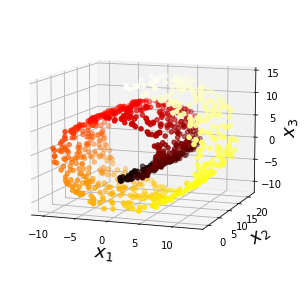

In [2]:
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

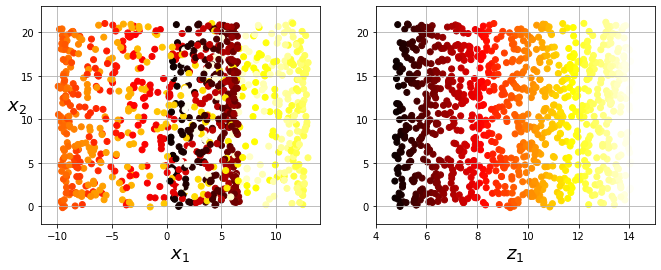

In [3]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

#save_fig("squished_swiss_roll_plot")
plt.show()


### Projections:  Principal Component Analysis (PCA)

This is a highly effective dimensionality reduction technique first proposed by Karl Pearson in 1901.

It is a projection method that simply projects the data onto a lower dimensional subspace. 


There are two equivalent points of view on how it basically works.

1) The $d$-dimensional data is projected onto the $d' < d$ dimensional hyperplane such that the variance of the data under the projection is maximal.

2) The $d$-dimensional data is projected onto the $d' <d$ dimensional hyperplane such that the mean squared distance between the dataset and the image points under the projection is minimal. 


A summary of (2):  PCA projects the $d$-dimensional data onto the "closest $d'$ dimensional hyperplane".



### Pictures...

Some images from Geron's *Hands on Machine Learning*

https://github.com/ageron/handson-ml/blob/master/08_dimensionality_reduction.ipynb



![img](geron1.png)

![img](geron2.png)

### How PCA works


In this cell we describe what PCA does (though not how it's actually computed).

Assume we have a dataset $X$ of $d$-dimensional points.

For a vector $\bar{v} \in \mathbb{R}^d$, let $\pi_{\bar{v}}(X)$ denote the projection of $X$ onto the vector $\bar{v}$.

PCA defines the following vectors $\bar{c}_1,\bar{c}_2,\ldots,\bar{c}_d$ which are called the *principal components* of the dataset.

The principal components are chosen to be unit vectors but sign doesn't matter.


1. $\bar{c}_1 = \text{argmax}_{\bar{v} \in \mathbb{R}^d} \,\text{var} (\pi_{\bar{v}}(X))$
1. $\bar{c}_2 = \text{argmax}_{\bar{v} \in \langle \bar{c}_1 \rangle^\perp} \,\text{var} (\pi_{\bar{v}}(X))$
1. $\bar{c}_3 = \text{argmax}_{\bar{v} \in \langle \bar{c}_1,\bar{c}_2 \rangle^\perp} \,\text{var} (\pi_{\bar{v}}(X))$

etc

d. $\bar{c}_d = \text{argmax}_{\bar{v} \in \langle \bar{c}_1,\bar{c}_2,\ldots,\bar{c}_{d-1} \rangle^\perp} \,\text{var} (\pi_{\bar{v}}(X))$




### Principal Components Analysis (PCA)

Uses singluar value decomposition:

$$ X = U\Sigma V^T$$

Here $U$ is $N\times N$ and unitary

$\Sigma$ is $N \times d$ and rectangular diagonal

$V$ is $d\times d$ and unitary

The columns of $V$ are the *principal components*.

The principal components are an orthogonal basis for the data space.

Projection onto the first $k$ principal components reduces dimensionality while preserving maximal variance.

This gives a low dimensional version of the data which retains as much information as possible.

### Axis oriented data

Another use for PCA is to "rectify" the data with respect to the coordinate axes.

This may make certain algorithms work better (eg tree based methods).

http://randomanalyses.blogspot.com/2012/01/principal-components-analysis.html

![img](matlab.png)



## Example of PCA using the breast cancer dataset

We will compute the principal components, and project onto the first two principal components.


In [4]:

D = np.loadtxt(open("num_data.txt", "rb"), delimiter=",", skiprows=0)

col_names = ["ID","Diagnosis","mean_radius","std_err_radius","worst_radius",
            "mean_texture","std_err_texture","worst_texture",
            "mean_perimeter","std_err_perimeter","worst_perimeter",
            "mean_area","std_err_area","worst_area",
            "mean_smoothness","std_err_smoothness","worst_smoothness",
            "mean_compactness","std_err_compactness","worst_compactness",
            "mean_concavity","std_err_concavity","worst_concavity",
            "mean_concave_pts","std_err_concave_pts","worst_concave_pts",
            "mean_symmetry","std_err_symmetry","worst_symmetry",
            "mean_fractal_dim","std_err_fractal_dim","worst_fractal_dim"]
X = np.copy(D[:,2:])
y = 2*D[:,1] -1  # so that y in {-1,1}, not {0,1}

names = col_names[2:]
X.shape[1],len(names)


(30, 30)

In [5]:
## PCA via SVD assumes that the data is centered.

X_centered = X-X.mean(axis=0)
X_centered.mean(axis=0)

array([-1.10608652e-14, -2.84841473e-14, -1.72328467e-14, -3.17883583e-13,
        8.51325454e-17, -6.14500639e-17, -2.46824627e-17,  3.80968446e-17,
       -5.04624657e-17, -1.07315055e-17, -2.75311896e-16, -4.76088608e-16,
        3.76656332e-15, -3.37788770e-14, -2.21794610e-18, -6.67670371e-18,
        2.64873068e-17, -1.67679774e-18, -2.67068148e-18, -7.98003286e-19,
       -1.11826190e-14,  1.08204794e-14, -4.20581359e-14,  2.28772283e-13,
       -1.18753864e-16, -3.46237391e-16,  1.18631915e-16, -1.32680432e-17,
       -1.45314341e-16,  4.52552465e-17])

In [6]:
U,s,Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:,0]
c2 = Vt.T[:,1]
c1

array([-5.08623202e-03, -2.19657026e-03, -3.50763298e-02, -5.16826469e-01,
       -4.23694535e-06, -4.05260047e-05, -8.19399539e-05, -4.77807775e-05,
       -7.07804332e-06,  2.62155251e-06, -3.13742507e-04,  6.50984008e-05,
       -2.23634150e-03, -5.57271669e-02,  8.05646029e-07, -5.51918197e-06,
       -8.87094462e-06, -3.27915009e-06,  1.24101836e-06,  8.54530832e-08,
       -7.15473257e-03, -3.06736622e-03, -4.94576447e-02, -8.52063392e-01,
       -6.42005481e-06, -1.01275937e-04, -1.68928625e-04, -7.36658178e-05,
       -1.78986262e-05, -1.61356159e-06])

In [7]:
## most important features?
np.array(names)[np.argsort(np.abs(c1))]

array(['std_err_concavity', 'worst_smoothness', 'mean_concavity',
       'worst_fractal_dim', 'mean_area', 'worst_compactness',
       'std_err_texture', 'mean_compactness', 'mean_symmetry',
       'worst_perimeter', 'std_err_compactness', 'std_err_fractal_dim',
       'worst_texture', 'std_err_perimeter', 'worst_area',
       'mean_fractal_dim', 'mean_perimeter', 'std_err_symmetry',
       'worst_symmetry', 'std_err_area', 'std_err_radius',
       'mean_smoothness', 'mean_concave_pts', 'mean_radius',
       'worst_concavity', 'worst_radius', 'std_err_concave_pts',
       'std_err_smoothness', 'mean_texture', 'worst_concave_pts'],
      dtype='<U19')

### Computing the projection

Once we get $V$ we know the principal components.

The following shows how we actually compute the projection.


In [8]:
W_2 = Vt.T[:,:2]
X2D = X_centered@W_2
X2D.shape

(569, 2)

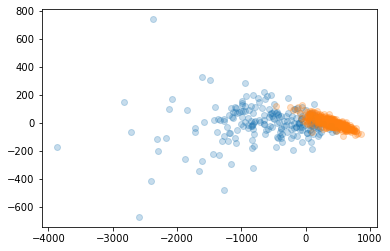

In [9]:

import matplotlib.pyplot as plt

for yy in set(y):
    XX = X2D[y==yy]
    plt.scatter(XX[:,0],XX[:,1],alpha=0.25)
plt.show()    

### PCA via the library

The following will also perform PCA.

This way the data is centered for you. 

Notice that this method reverses the sign of the 1st principal component (which doesn't matter). 

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
Xpca = pca.fit_transform(X) ## autocentered
Xpca.shape

(569, 2)

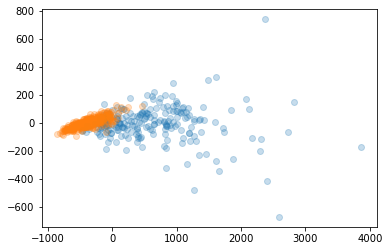

In [11]:
for yy in set(y):
    XX = Xpca[y==yy]
    plt.scatter(XX[:,0],XX[:,1],alpha=0.25)
plt.show()   

### The explained variance ratio

We want to use only *some* of the principal components for the projection in most cases.

We can see how important each component is via the *explained variance ratio*.

The evr of $\bar{c}_j$ is the percentage of variance in the data captured by $\bar{c}_j$.



In [12]:
pca = PCA()
Xpca = pca.fit_transform(X) ## autocentered
Xpca.shape

(569, 30)

In [13]:
pca.explained_variance_ratio_

array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04,
       8.82724536e-05, 6.64883951e-06, 4.01713682e-06, 8.22017197e-07,
       3.44135279e-07, 1.86018721e-07, 6.99473205e-08, 1.65908880e-08,
       6.99641650e-09, 4.78318306e-09, 2.93549214e-09, 1.41684927e-09,
       8.29577731e-10, 5.20405883e-10, 4.08463983e-10, 3.63313378e-10,
       1.72849737e-10, 1.27487508e-10, 7.72682973e-11, 6.28357718e-11,
       3.57302295e-11, 2.76396041e-11, 8.14452259e-12, 6.30211541e-12,
       4.43666945e-12, 1.55344680e-12])

### Cumulative evr

If we look at the evr of the principal components cumulatively, we can see how many principal components we need to capture a certain percentage of the variance.

For example, we can find the $d'$ such that projection onto the first $d'$ principal components captures 95% of the variance in the data.

In the case of the breast cancer data, the first component alone captures 98% of the variance. 

In [14]:
np.cumsum(pca.explained_variance_ratio_)

array([0.98204467, 0.99822116, 0.99977867, 0.9998996 , 0.99998788,
       0.99999453, 0.99999854, 0.99999936, 0.99999971, 0.99999989,
       0.99999996, 0.99999998, 0.99999999, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

### Performance loss

Of course when we project down we do lose some information.

Therefore classification accuracy will usually (but not always) decrease.

Let's try it out for the breast cancer data.



In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y)

pca = PCA(n_components=4)
Xpca_train = pca.fit_transform(X_train) ## autocentered
Xpca_test = pca.transform(X_test)

from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()

clf.fit(Xpca_train,y_train)

clf.score(Xpca_test,y_test)

0.9370629370629371

In [16]:

clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.951048951048951

### Experiments with MNIST

The MNIST dataset has 728 dimensions.

We experiment with using PCA on the data. 


In [17]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [18]:
X.shape

(70000, 784)

In [19]:
pca = PCA()
Xpca = pca.fit_transform(X) ## autocentered
Xpca.shape

(70000, 784)

In [20]:
np.cumsum(pca.explained_variance_ratio_)[:50]

array([0.09746116, 0.16901561, 0.23051091, 0.28454476, 0.3334341 ,
       0.37648637, 0.40926898, 0.4381654 , 0.46574904, 0.48917044,
       0.51023733, 0.53061286, 0.5476835 , 0.5646237 , 0.58045752,
       0.59532097, 0.60851456, 0.6213047 , 0.63317742, 0.64470679,
       0.65536719, 0.66546513, 0.67505665, 0.684153  , 0.69298586,
       0.70137405, 0.70947236, 0.71732954, 0.72473217, 0.73163231,
       0.73819375, 0.74464845, 0.75065664, 0.75651276, 0.7621803 ,
       0.767615  , 0.77266217, 0.77753297, 0.78232252, 0.78699846,
       0.79154214, 0.79599132, 0.80017349, 0.80413513, 0.8079722 ,
       0.81173005, 0.81534432, 0.81883456, 0.82222188, 0.82541884])

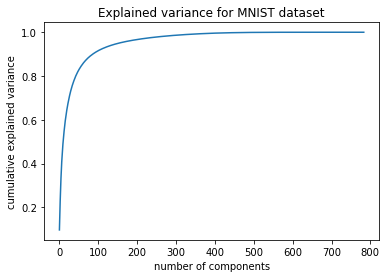

In [21]:

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Explained variance for MNIST dataset")
plt.show()

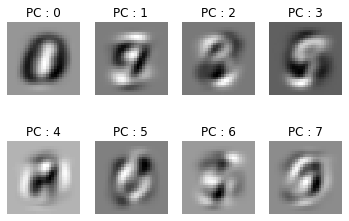

In [22]:
pca.components_

_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(pca.components_, range(8)))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('PC : {}'.format(label))
for ax, (image, label) in zip(axes[1, :], images_and_labels[4:8]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('PC : {}'.format(label))

In [23]:
pca = PCA(n_components=2)
Xpca = pca.fit_transform(X) ## autocentered
Xpca.shape

(70000, 2)

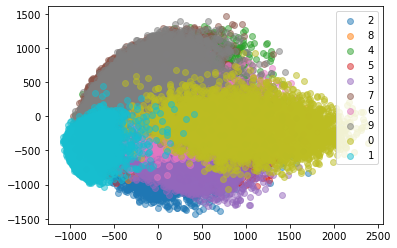

In [24]:

for yy in set(y):
    XX = Xpca[y==yy]
    plt.scatter(XX[:,0],XX[:,1],alpha=0.5,label=yy)
plt.legend()    
plt.show()  

### Randomized PCA

If you try to do the SVD approach to PCA on the MNIST data you find that it never terminates (see below).

This is because the computational complexity of standard PCA is 

$$ O(N\times d^2 + d^3) $$

When $d = 728$ this is infeasible. 

In cases like this the library uses the "randomized PCA" algorithm.

This quickly finds an approximation to the requested number of principal components $d'$.

It runs in time

$$ O(N \times d' + (d')^3). $$

Note that this doesn't depend on $d$ at all.



In [25]:
"""X_centered = X-X.mean(axis=0)
X_centered.mean(axis=0)

U,s,V = np.linalg.svd(X_centered)
c1 = V.T[:,0]
c2 = V.T[:,1]
c1"""
### Computationally infeasible

'X_centered = X-X.mean(axis=0)\nX_centered.mean(axis=0)\n\nU,s,V = np.linalg.svd(X_centered)\nc1 = V.T[:,0]\nc2 = V.T[:,1]\nc1'

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y)


pca = PCA(n_components=0.95)
Xpca_train = pca.fit_transform(X_train) ## autocentered
Xpca_test = pca.transform(X_test)

Xpca_train.shape

(52500, 154)

In [32]:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.9664

In [33]:
model.fit(Xpca_train,y_train)
model.score(Xpca_test,y_test)


0.9449142857142857

In [47]:
%timeit model.fit(Xpca,y_train)
#1min 5s ± 4.43 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


ValueError: Found input variables with inconsistent numbers of samples: [70000, 52500]

In [35]:
%timeit model.fit(X_train,y_train)
#23.6 s ± 422 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


9.3 s ± 448 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### "Decompressing" from the PCA transform

By inverting the PCA transformation we can visualize how much information is lost in the projection.

$$X_{\text{recovered}} = X_{\text{proj}}\cdot W_d^T$$

where $W_d = $`Vt.T[:,:d]`

In [36]:
X_recovered = pca.inverse_transform(Xpca_train)

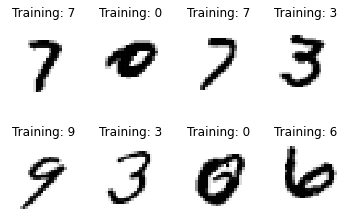

In [37]:
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(X_train, y_train))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: {}'.format(label))
for ax, (image, label) in zip(axes[1, :], images_and_labels[4:8]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: {}'.format(label))

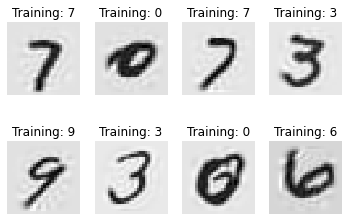

In [38]:
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(X_recovered, y_train))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: {}'.format(label))
for ax, (image, label) in zip(axes[1, :], images_and_labels[4:8]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: {}'.format(label))

### Manifold Learning

https://scikit-learn.org/stable/modules/manifold.html



### Locally Linear Embedding

https://cs.nyu.edu/~roweis/lle/algorithm.html

First measure how each training instance linearly relates to its closest neighbors.

Then look for a low dimensional representation where these local relationships are best preserved.

This is particularly good at "unrolling" manifolds. 

First:

For each $\bar{x}$ in $X$, identify $k$ closest neighbors ($k=10$?)

Second:

Compute

$$\hat{W} = \text{argmin}_W \sum_{i=1}^N |\!|\bar{x}_i - \sum_{j=1}^N w_{i,j}\bar{x}_j |\!|^2$$

Subject to:

$w_{i,j} = 0$ if $\bar{x}_j$ is not in knn $\bar{x}_i$.

$\sum_{j=1}^N w_{i,j} =1$ for $i=1,2,\ldots,N$.

Now $\hat{W}$ stores local linear relationships.

Now compute

$$\hat{Z} = \text{argmin}_Z \sum_{i=1}^N |\!|\bar{z}_i - \sum_{j=1}^N w_{i,j}\bar{z}_j |\!|^2$$

![img](lle.gif)

In [39]:
from sklearn.manifold import LocallyLinearEmbedding

#lle = LocallyLinearEmbedding(n_components=2,n_neighbors=10,n_jobs=-1)
#Xlle = lle.fit_transform(X)


In [40]:
#for yy in set(y):
#    XX = Xlle[y==yy]
#    plt.scatter(XX[:,0],XX[:,1],alpha=0.5,label=yy)
#plt.legend()    
#plt.show()  

In [41]:
## Breast cancer
import matplotlib.pyplot as plt
import numpy as np
X = np.copy(D[:,2:])

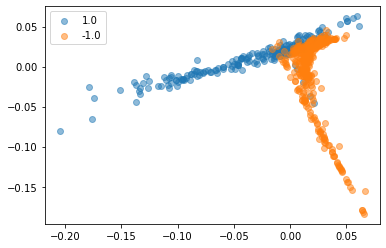

In [42]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2,n_neighbors=10)
Xlle = lle.fit_transform(X)
y = 2*D[:,1] -1  # so that y in {-1,1}, not {0,1}

for yy in set(y):
    XX = Xlle[y==yy]
    plt.scatter(XX[:,0],XX[:,1],alpha=0.5,label=yy)
plt.legend()    
plt.show()  

### LLE run time

$O(N\log(N)d\log(k))$ to find KNN

$O(Ndk^3)$ for computing $\hat{W}$

$O(dN^2)$ for computing $\hat{Z}$


### Other methods...


### t-Distributed Stochastic Neighbor Embedding (t-SNE)

"Reduces dimensionality while trying to keep similar instances close and dissimilar instances apart"


In [43]:
from sklearn.manifold import TSNE
Xtsne = TSNE(n_components=2).fit_transform(X)

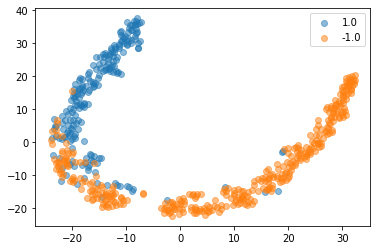

In [44]:

for yy in set(y):
    XX = Xtsne[y==yy]
    plt.scatter(XX[:,0],XX[:,1],alpha=0.5,label=yy)
plt.legend()    
plt.show()  

### Isomap

"creates a graph by connecting each instance to its nearest neighbors, then reduces dimensionality while trying to preserve geodesic (graph) distances between the instances"

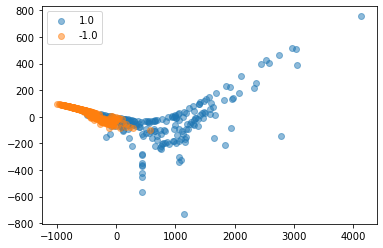

In [45]:
from sklearn.manifold import Isomap

X_iso = Isomap(n_components =2).fit_transform(X)

for yy in set(y):
    XX = X_iso[y==yy]
    plt.scatter(XX[:,0],XX[:,1],alpha=0.5,label=yy)
plt.legend()    
plt.show()  


### Multidimensional Scaling

"reduces dimensionality while trying to preserve the distances between the instances"


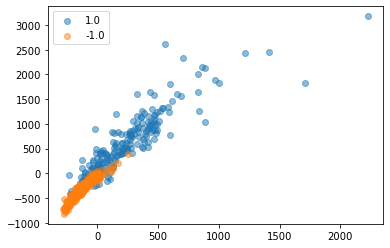

In [46]:
from sklearn.manifold import MDS

X_mds = MDS(n_components=2).fit_transform(X)

for yy in set(y):
    XX = X_mds[y==yy]
    plt.scatter(XX[:,0],XX[:,1],alpha=0.5,label=yy)
plt.legend()    
plt.show()  
